### Arrays

Dask has an array framework which sits on top of numpy and automatically parallelizes standard numpy operations. Look at the performance increase from summing up 1 billion random numbers with one process vs four processes.

In [8]:
import numpy as np
import dask.array as da

In [16]:
np_arr = np.random.rand(1000000000)
d_arr = da.from_array(np_arr, chunks=len(np_arr) // 4)

In [17]:
d_arr.chunks

((250000000, 250000000, 250000000, 250000000),)

In [18]:
%%time

np_arr.sum()

Wall time: 1.12 s


499996141.3981724

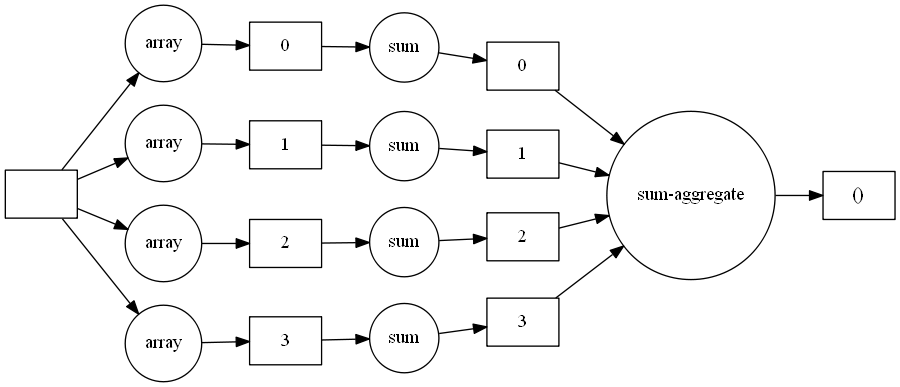

In [19]:
d_sum = d_arr.sum()
d_sum.visualize(rankdir='LR')

In [20]:
%%time

d_sum.compute()

Wall time: 433 ms


499996141.3981705